### Treść zadania

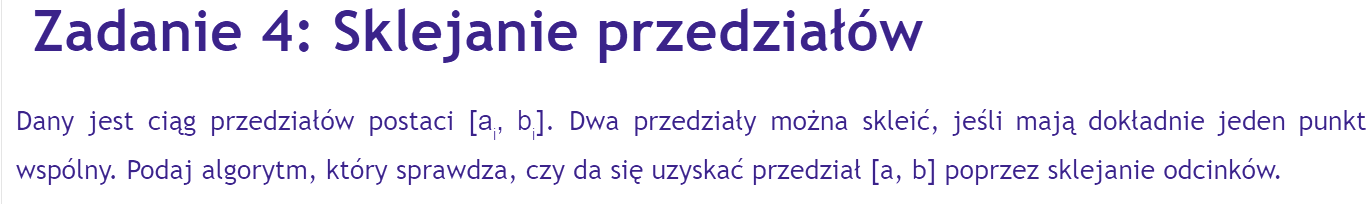

### Omówienie algorytmu

Algorytm jest nieco skomplikowany, ponieważ składa się z kilku etapów przygotowawczych. Po prawidłowym przygotowaniu danych, bardzo łatwo jest sprawdzić możliwość połączenia przedziałów w taki sposób, aby otrzymać przedział docelowy.
###### Etap I - wybranie odpowiedniej reprezentacji grafu:
Ponieważ chcemy rozwiązać problem, przy pomocy grafu (tak jest wbrew pozorom najłatwiej i najszybciej. Prawdopodobnie da się, przy pomocy programowania dynamicznego, ale grafem jest lepiej), musimy się zastanowić, co ma być wierzchołkami, a co krawędziami grafu. Najpierw na myśl przychodzi obranie przedziałów jako wierzchołków, a możliwych połączeń jako krawędzi. Nie jest jednak to dobre podejście, ponieważ sama implementacja algorytmu będzie trudniejsza (za bardzo nie wiadomo, jak w łatwy sposób utworzyć graf w krótkim czasie), a także algorytm będzie znacznie wolniejszy. Wynika to stąd, że możemy mieć wiele różnych przedziałów, które kończą się i zaczynają w tym samym punkcie. Wówczas z każdego spośród tych, które kończą się w danym punkcie, musielibyśmy poprowadzić krawędź do każdego, który zaczyna się w tym punkcie. Zatem dla $ m $ przedziałów, które kończą się w danym punkcie oraz $ k $, które się w nim zaczynają, otrzymalibyśmy $ m \cdot k $ krawędzi TYLKO W JEDNYM PUNKCIE. Zatem dużo lepiej jest postąpić na odwrót i jako wierzchołki potraktować punkty połączenia przedziałów (mam na myśli punkty, w których jakieś przedziały się kończą, a inne zaczynają), a jako krawędzie, które je łączą (łączą te wierzchołki), potraktować te przedziały. Wówczas mamy pewność, że wierzchołków będzie nie więcej niż $ 2 \cdot n $, a krawędzi dokładnie $ n $ (gdzie $ n $ jest liczbą przedziałów). Jeszcze jedna uwaga, graf musi być grafem skierowanym, bo chcemy łączyć kolejne przedziały, a nie tworzyć jakieś dziwne połączenia nie po kolei. Zostaje jeszcze do omówienia kilka problemów. Wciąż za bardzo nie wiemy, jak się mają wierzchołki do punktów styku przedziałów. Wierzchołkom zazwyczaj odpowiadają pewne liczby naturalne, a nie jakieś dziwne, potencjalnie ujemne i niecałkowite liczby. Omówieniem tego zajmiemy się w kolejnym podpunkcie.
###### Etap II - utworzenie grafu:
W pierwszej kolejności konieczne jest przemapowanie współrzędnych przedziałów na kolejne liczby naturalne (będą to numery (indeksy) wierzchołków). Najłatwiej tego dokonać, poprzez wrzucenie wszystkich współrzędnych (zarówno początków jak i końców) przedziałów do jednej tablicy, a następnie ich posortowanie w porządku niemalejącym. Kolejnym krokiem jest odrzucenie powtarzających się wartości, co najłatwiej uczynimy, tworząc nową tablicę dynamiczną, w której zapiszemy tylko niepowtarzające się wartości z posortowanej tablicy koordynatów, którą utworzyliśmy wcześniej. Teraz pozostaje już albo zamiana współrzędnych przedziałów na odpowiadające im indeksy w posortowanej tablicy koordynatów, albo utworzenie nowej tablicy z nowymi współrzędnymi przedziałów. My się nie przejmujemy danymi wejściowymi, więc dla nas lepszym rozwiązaniem jest modyfikacja wyjściowych przedziałów. Dokonujemy tego, przechodząc w pętli przez wszystkie przedziały i, przy pomocy Binary Searcha, poszukując indeksu każdej współrzędnej, którą następnie zamieniamy na odpowiadający jej indeks. Jest to operacja jednoznaczna i w razie potrzeby, bardzo łatwo jesteśmy w stanie proces ten odwrócić, przechodząc ponownie przez tablicę przemapowanych przedziałow i wrzucając w miejsce ich współrzędnych, które są teraz indeksami z tablicy koordynatów, odpowiadające im koordynaty z tej tablicy. Pozostaje jeszcze utworzenie grafu z tych przedziałów. Najlepiej jest wybrać reprezentację, przy pomocy list sąsiedztwa, ponieważ zazwyczaj będziemy mieli niewiele krawędzi (tzn. niewiele przedziałów będzie łączyło te same punkty styków innych przedziałów). Ponieważ mamy już przedziały reprezentowane, przy pomocy indeksów, wystarczy potraktować te indeksy jako numery wierzchołków, które są łączone przez te przedziały (krawędzie) i, przechodząc w pętli przez przedziały, dodawać pod indeksem początku do tablicy indeks końca przedziału (indeks początku oznacza wierzchołek, z którego wychodzi krawędź, a indeks końca wierzchołek, do którego wchodzi krawędź).
###### Etap III - znalezienie ścieżki:
Poszukiwanie przedziału docelowego sprowadza się teraz do sprawdzenia, czy istnieje ścieżka pomiędzy dwoma wierzchołkami grafu. Ponieważ poszukiwany przedział wciąż jest określony przez współrzędne, a nie indeksy współrzędnych, również musimy go przemapować. Na tym etapie warto sprawdzić, czy w ogóle istnieje jakikolwiek przedział, który ma taką samą współrzędną początku lub końca, co współrzędne początku i końca poszukiwanego przedziału. Jeżeli nie, oznacza to, że bez sensu jest poszukiwanie przedziałów do połączenia, bo ich nigdy nie znajdziemy. W takiej sytuacji zwracamy od razu fałsz. W przeciwnym razie, szukamy ścieżki w grafie między takimi indeksami $ i $ oraz $ j $, że indeks $ i $ jest indeksem pierwszej współrzędnej docelowego przedziału w tablicy posortowanych współrzędnych, a $ j $ jest indeksem jego końca w tej tablicy. Jeżeli znajdziemy taką ścieżkę, oznacza to, że da się wybrać takie przedziały, których połączenie na końcach da nam oczekiwany przedział. W przeciwnym razie, nie da się połączyć. 
<br><br>
Jeszcze taka drobna uwaga, samego sprawdzenia, czy istnieją wśród przedziałów takie współrzędne, kóre odpowiadają współrzędnym początku i końca docelowego przedziału, najlepiej dokonać przed utworzeniem grafu i przemapowaniem wszystkich przedziałów - nie będziemy wykonywać niepotrzebnych operacji. Ja tego nie robię, ponieważ napisałem funkcję w taki sposób, że najpierw jest tworzony graf przedziałów, jakie możemy ze sobą łączyć, a następnie szukany jest docelowy przedział. Szukanie możemy wówczas wykonać wielokrotnie dla różnych przedziałów docelowych, bez konieczności ponownego budowania grafu.

### Złożoność

###### Obliczeniowa:
$ O((2n) \cdot log(2n)) $ - sortowanie współrzędnych początków i końców przedziałów, <br>
$ O(n \cdot log(n)) $ - mapowanie współrzędnych przedziałów (używamy dla każdego Binary Searcha), <br>
$ O(n) $ - utworzenie grafu połączeń przedziałów, w którym krawędziami są przedziały, a wierzchołkami są miejsca stykania się przedziałów domkniętych (te miejsca, w których można je skleić), <br>
$ O(n) $ - przeszukiwanie grafu algorytmem DFS (sprawdzanie, czy istnieje ścieżka pomiędzy wierzchołkami) (będzie maksymalnie $ n $ wierzchołków do przejścia, gdy można połączyć wszystkie przedziały), <br>
RAZEM: <br>
$ O(n \cdot log(n)) $
###### Pamięciowa:
$ O(n) $ - wszystkie tablice, jakie są tworzone, zależą rozmiarem od liczby przedziałów na wejściu. Również liczba elementów, składajacych się na graf, nie przekracza $ n $ krawędzi (oraz wierzchołków).

### Implementacja

In [1]:
def binary_search(A: 'sorted array', val: 'searched value'):
    n = len(A)
    l = 0
    r = n - 1
    while l <= r:
        m = (l + r) // 2
        if A[m] < val:
            l = m + 1
        else:
            r = m - 1
    return l if l < n and A[l] == val else -1


def map_spans(S: 'array of spans'):
    # Unpack all coordinates to one array and sort them in a non-decreasing order
    n = len(S)
    A = [0] * (2 * n)
    for i in range(n):
        A[2 * i] = S[i][0]
        A[2 * i + 1] = S[i][1]
    A.sort()
    
    # Filter out repeated values
    B = [A[0]]
    for i in range(1, 2 * n):
        if A[i - 1] == A[i]:
            continue
        B.append(A[i])
    
    # Map spans (change their coordiantes to natural numbers)
    for i in range(n):
        S[i][0] = binary_search(B, S[i][0])
        S[i][1] = binary_search(B, S[i][1])
        
    # Return array of sorted coordinates with no repetitions
    return B


def create_spans_graph(S: 'array of spans'):
    A = map_spans(S)
    n = len(A)  # There will be as many vertices as the number of unique coordinates
    G = [[] for _ in range(n)]
    
    for span in S:
        G[span[0]].append(span[1])  # It's important that a graph is directed
        
    return G, A


def is_path_in_graph(G: 'graph represended using adjacency lists', u: 'begin vertex', v: 'end vertex'):
    n = len(G)
    visited = [False] * n
    
    def dfs(i):
        if i == v: return True 
        visited[i] = True
        for j in G[i]:
            if not visited[j] and dfs(j):
                return True
        return False
        
    return dfs(u)
    

def can_merge_spans_init(S: 'array of spans'):
    G, A = create_spans_graph(S)
    
    def can_merge_spans(target: 'target span from merged spans'):
        begin_i = binary_search(A, target[0])
        end_i   = binary_search(A, target[1])
        # If there is no span which has a coordinate the same as the target, return False
        if begin_i < 0 or end_i < 0:
            return False
        # Otherwise, using a DFS algorithm, search for a path between begin_i and end_i
        return is_path_in_graph(G, begin_i, end_i)
    
    return can_merge_spans

###### Kilka testów

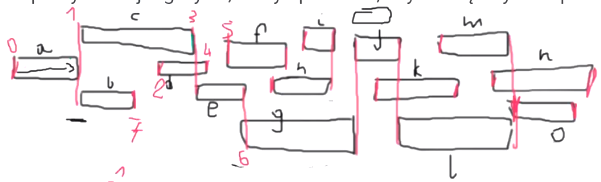

In [2]:
spans = [[-10.5, 3.4], [3.4, 5.12], [3.4, 8.56], [6.83, 9.21], [8.56, 10.78], [9.93, 13.45],
#              a            b             c           d              e              f
         [10.78, 18.92], [11.92, 16.05], [15.02, 16.05], [18.92, 24.05], [22.14, 28.95],
#              g                h              i                j               k
         [24.05, 35.42], [25.61, 35.42], [33.12, 45.82], [35.42, 42.43]]
#              l                m              n                o

can_merge_spans = can_merge_spans_init(spans)

In [3]:
target = [-10.5, 42.43]

print(can_merge_spans(target))

True


In [4]:
target = [3.4, 16.05]

print(can_merge_spans(target))

False


In [5]:
target = [3.4, 123.231]

print(can_merge_spans(target))

False


In [6]:
target = [11.92, 16.05]

print(can_merge_spans(target))

True


In [7]:
target = [16.05, 11.92]

print(can_merge_spans(target))

False


### (Dodatkowo) Pobieranie przedziałów do połączenia

#### Implementacja #1
##### (Gorsze odtwarzanie ciągu przedziałów)

In [8]:
def binary_search(A: 'sorted array', val: 'searched value'):
    n = len(A)
    l = 0
    r = n - 1
    while l <= r:
        m = (l + r) // 2
        if A[m] < val:
            l = m + 1
        else:
            r = m - 1
    return l if l < n and A[l] == val else -1


def map_spans(S: 'array of spans'):
    # Unpack all coordinates to one array and sort them in a non-decreasing order
    n = len(S)
    A = [0] * (2 * n)
    for i in range(n):
        A[2 * i] = S[i][0]
        A[2 * i + 1] = S[i][1]
    A.sort()
    
    # Filter out repeated values
    B = [A[0]]
    for i in range(1, 2 * n):
        if A[i - 1] == A[i]:
            continue
        B.append(A[i])
    
    # Map spans (change their coordiantes to natural numbers)
    for i in range(n):
        S[i][0] = binary_search(B, S[i][0])
        S[i][1] = binary_search(B, S[i][1])
        
    # Return array of sorted coordinates with no repetitions
    return B


def create_spans_graph(S: 'array of spans'):
    A = map_spans(S)
    n = len(A)  # There will be as many vertices as the number of unique coordinates
    G = [[] for _ in range(n)]
    
    for span in S:
        G[span[0]].append(span[1])  # It's important that a graph is directed
        
    return G, A


def get_spans_to_merge(G: 'graph represended using adjacency lists',
                       A: 'array of sorted coordinates with no repetitions',
                       u: 'begin vertex', 
                       v: 'end vertex'):
    n = len(G)
    visited = [False] * n
    temp    = []
    result  = []
    
    def dfs(i):
        temp.append(A[i])
        if i == v: return True
        visited[i] = True
        for j in G[i]:
            if not visited[j] and dfs(j):
                return True
        # Remove a span which was improperly chosen
        temp.pop()
        return False
        
    if dfs(u):
        # Restore spans from coordinates which were merged
        for i in range(1, len(temp)):
            result.append([temp[i - 1], temp[i]])
    
    return result
    

def merge_spans_init(S: 'array of spans'):
    G, A = create_spans_graph(S)
    
    def merge_spans(target: 'target span from merged spans'):
        begin_i = binary_search(A, target[0])
        end_i   = binary_search(A, target[1])
        # If there is no span which has a coordinate the same as the target, return False
        if begin_i < 0 or end_i < 0:
            return []
        # Otherwise, using a DFS algorithm, search for the path between begin_i and end_i
        return get_spans_to_merge(G, A, begin_i, end_i)
    
    return merge_spans

###### Kilka testów

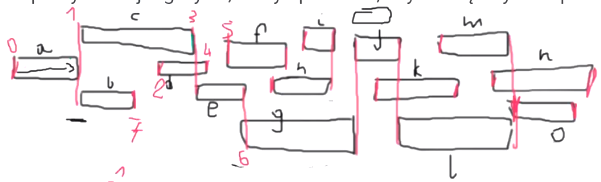

In [9]:
spans = [[-10.5, 3.4], [3.4, 5.12], [3.4, 8.56], [6.83, 9.21], [8.56, 10.78], [9.93, 13.45],
#              a            b             c           d              e              f
         [10.78, 18.92], [11.92, 16.05], [15.02, 16.05], [18.92, 24.05], [22.14, 28.95],
#              g                h              i                j               k
         [24.05, 35.42], [25.61, 35.42], [33.12, 45.82], [35.42, 42.43]]
#              l                m              n                o

merge_spans = merge_spans_init(spans)

In [10]:
target = [-10.5, 42.43]

print(merge_spans(target))

[[-10.5, 3.4], [3.4, 8.56], [8.56, 10.78], [10.78, 18.92], [18.92, 24.05], [24.05, 35.42], [35.42, 42.43]]


In [11]:
target = [3.4, 16.05]

print(merge_spans(target))

[]


In [12]:
target = [3.4, 123.231]

print(merge_spans(target))

[]


In [13]:
target = [11.92, 16.05]

print(merge_spans(target))

[[11.92, 16.05]]


In [14]:
target = [10.78, 35.42]

print(merge_spans(target))

[[10.78, 18.92], [18.92, 24.05], [24.05, 35.42]]


In [15]:
target = [16.05, 11.92]

print(merge_spans(target))

[]


In [16]:
target = [-10.5, 10.78]

print(merge_spans(target))

[[-10.5, 3.4], [3.4, 8.56], [8.56, 10.78]]


#### Implementacja #2
##### (Lepsze odtwarzanie ciągu przedziałów)

In [17]:
def binary_search(A: 'sorted array', val: 'searched value'):
    n = len(A)
    l = 0
    r = n - 1
    while l <= r:
        m = (l + r) // 2
        if A[m] < val:
            l = m + 1
        else:
            r = m - 1
    return l if l < n and A[l] == val else -1


def map_spans(S: 'array of spans'):
    # Unpack all coordinates to one array and sort them in a non-decreasing order
    n = len(S)
    A = [0] * (2 * n)
    for i in range(n):
        A[2 * i] = S[i][0]
        A[2 * i + 1] = S[i][1]
    A.sort()
    
    # Filter out repeated values
    B = [A[0]]
    for i in range(1, 2 * n):
        if A[i - 1] == A[i]:
            continue
        B.append(A[i])
    
    # Map spans (change their coordiantes to natural numbers)
    for i in range(n):
        S[i][0] = binary_search(B, S[i][0])
        S[i][1] = binary_search(B, S[i][1])
        
    # Return array of sorted coordinates with no repetitions
    return B


def create_spans_graph(S: 'array of spans'):
    A = map_spans(S)
    n = len(A)  # There will be as many vertices as the number of unique coordinates
    G = [[] for _ in range(n)]
    
    for span in S:
        G[span[0]].append(span[1])  # It's important that a graph is directed
        
    return G, A


def get_path(parents, t, A):
    path = []
    while parents[t] is not None:
        path.append([A[parents[t]], A[t]])
        t = parents[t]
    path.reverse()
    return path


def get_spans_to_merge(G: 'graph represended using adjacency lists',
                       A: 'array of sorted coordinates with no repetitions',
                       s: 'begin vertex', 
                       t: 'end vertex'):
    n = len(G)
    parents = [None] * n
    parents[s] = s
    
    def dfs(u):
        if u == t: 
            return True
        for v in G[u]:
            if parents[v] is None:
                parents[v] = u
                if dfs(v): 
                    return True
        return False
    
    parents[s] = None
    
    return get_path(parents, t, A) if dfs(s) else []
    

def merge_spans_init(S: 'array of spans'):
    G, A = create_spans_graph(S)
    
    def merge_spans(target: 'target span from merged spans'):
        begin_i = binary_search(A, target[0])
        end_i   = binary_search(A, target[1])
        # If there is no span which has a coordinate the same as the target, return False
        if begin_i < 0 or end_i < 0:
            return []
        # Otherwise, using a DFS algorithm, search for the path between begin_i and end_i
        return get_spans_to_merge(G, A, begin_i, end_i)
    
    return merge_spans

###### Kilka testów

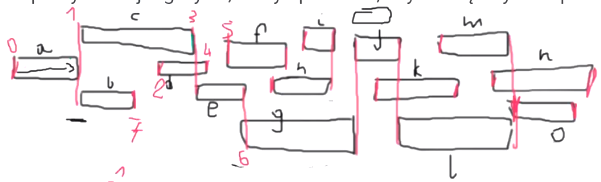

In [18]:
spans = [[-10.5, 3.4], [3.4, 5.12], [3.4, 8.56], [6.83, 9.21], [8.56, 10.78], [9.93, 13.45],
#              a            b             c           d              e              f
         [10.78, 18.92], [11.92, 16.05], [15.02, 16.05], [18.92, 24.05], [22.14, 28.95],
#              g                h              i                j               k
         [24.05, 35.42], [25.61, 35.42], [33.12, 45.82], [35.42, 42.43]]
#              l                m              n                o

merge_spans = merge_spans_init(spans)

In [19]:
target = [-10.5, 42.43]

print(merge_spans(target))

[[-10.5, 3.4], [3.4, 8.56], [8.56, 10.78], [10.78, 18.92], [18.92, 24.05], [24.05, 35.42], [35.42, 42.43]]


In [20]:
target = [3.4, 16.05]

print(merge_spans(target))

[]


In [21]:
target = [3.4, 123.231]

print(merge_spans(target))

[]


In [22]:
target = [11.92, 16.05]

print(merge_spans(target))

[[11.92, 16.05]]


In [23]:
target = [10.78, 35.42]

print(merge_spans(target))

[[10.78, 18.92], [18.92, 24.05], [24.05, 35.42]]


In [24]:
target = [16.05, 11.92]

print(merge_spans(target))

[]


In [25]:
target = [-10.5, 10.78]

print(merge_spans(target))

[[-10.5, 3.4], [3.4, 8.56], [8.56, 10.78]]
